# Day 19/10/2025

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from skimpy import skim
import missingno as msno

# Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/TMDB  IMDB Movies Dataset.csv'


In [ ]:
df = pd.read_csv(file_path, sep=None, engine="python")



In [ ]:
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes,cast
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2684780,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2346977,"Matthew McConaughey, Anne Hathaway, Michael Ca..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,3022443,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1431576,"Sam Worthington, Zoe Saldaña, Sigourney Weaver..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1508926,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434437 entries, 0 to 434436
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    434437 non-null  int64  
 1   title                 434437 non-null  object 
 2   vote_average          434437 non-null  float64
 3   vote_count            434437 non-null  int64  
 4   status                434437 non-null  object 
 5   release_date          415357 non-null  object 
 6   revenue               434437 non-null  int64  
 7   runtime               434437 non-null  int64  
 8   adult                 434437 non-null  bool   
 9   backdrop_path         184278 non-null  object 
 10  budget                434437 non-null  int64  
 11  homepage              54333 non-null   object 
 12  tconst                434437 non-null  object 
 13  original_language     434437 non-null  object 
 14  original_title        434437 non-null  object 
 15  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,434437.0,4.833331e+05,3.493972e+05,2.0,208492.0,415724.000,697231.000,1.485354e+06
vote_average,434437.0,3.612164e+00,3.145161e+00,0.0,0.0,4.600,6.200,1.000000e+01
vote_count,434437.0,4.905560e+01,5.137535e+02,0.0,0.0,1.000,6.000,3.449500e+04
revenue,434437.0,1.650041e+06,2.609189e+07,0.0,0.0,0.000,0.000,2.923706e+09
runtime,434437.0,6.643397e+01,6.345370e+01,0.0,15.0,80.000,96.000,1.440000e+04
budget,434437.0,6.422314e+05,7.223779e+06,0.0,0.0,0.000,0.000,8.880000e+08
popularity,434437.0,2.206229e+00,1.136385e+01,0.0,0.6,0.862,1.664,2.994357e+03
averageRating,434437.0,6.227387e+00,1.311912e+00,1.0,5.4,6.300,7.100,1.000000e+01
numVotes,434437.0,2.928505e+03,3.260026e+04,5.0,21.0,63.000,284.000,3.045590e+06


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
title,434437,372542,Die Hart 2: Die Harter,748
status,434437,6,Released,431552
release_date,415357,39466,2010-01-01,975
backdrop_path,184278,183171,/pfflHC4VtSAFb7oIT8SuI0S8CEq.jpg,85
homepage,54333,52767,http://www.wwe.com,23
tconst,434437,430340,tt32094375,1411
original_language,434437,158,en,234529
original_title,434437,391091,Die Hart 2: Die Harter,748
overview,392556,388349,Hart plans an innovative action film with unsc...,629
poster_path,359483,357055,/rosJ1CzIq4Re0YGqhVBgh9Bqc85.jpg,119


# Check NULL


In [ ]:
df.isnull().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
status,0
release_date,19080
revenue,0
runtime,0
adult,0
backdrop_path,250159


##### Collecting column  
#['vote_average', 'popularity', 'averageRating'],  
 ['id', 'vote_count', 'revenue', 'runtime', 'budget', 'numVotes'])

In [ ]:
float_columns = df.select_dtypes(include=['float']).columns.tolist()
int_columns = df.select_dtypes(include=['int']).columns.tolist()
float_columns, int_columns

(['vote_average', 'popularity', 'averageRating'],
 ['id', 'vote_count', 'revenue', 'runtime', 'budget', 'numVotes'])

In [ ]:
for column in int_columns:
    min_col = df[column].min()
    max_col = df[column].max()
    avg_col = df[column].mean()
    print(f"-----{column} column------")
    print(f"Min: {min_col}")
    print(f"Max: {max_col}")
    print(f"Avg: {avg_col}")

-----id column------
Min: 2
Max: 1485354
Avg: 483333.0840605197
-----vote_count column------
Min: 0
Max: 34495
Avg: 49.05559609333459
-----revenue column------
Min: 0
Max: 2923706026
Avg: 1650040.6222098947
-----runtime column------
Min: 0
Max: 14400
Avg: 66.43397086343934
-----budget column------
Min: 0
Max: 888000000
Avg: 642231.3553219454
-----numVotes column------
Min: 5
Max: 3045590
Avg: 2928.5045656792586


In [ ]:
for column in float_columns:
    min_col = df[column].min()
    max_col = df[column].max()
    avg_col = df[column].mean()
    print(f"-----{column} column------")
    print(f"Min: {min_col}")
    print(f"Max: {max_col}")
    print(f"Avg: {avg_col}")

-----vote_average column------
Min: 0.0
Max: 10.0
Avg: 3.612163577227538
-----popularity column------
Min: 0.0
Max: 2994.357
Avg: 2.2062294482283953
-----averageRating column------
Min: 1.0
Max: 10.0
Avg: 6.2273871700614825


In [ ]:
#status column
df['status'].value_counts()

,count
status,
Released,431552
Post Production,1674
In Production,1032
Planned,165
Canceled,9
Rumored,5


In [ ]:
#release_date column
df['release_date'].value_counts()[:5] #top5

,count
release_date,
2010-01-01,975
2009-01-01,970
1997-01-01,924
1987-01-01,899
2006-01-01,896


In [ ]:
#adult column
df['adult'].value_counts()

,count
adult,
False,421815
True,12622


In [ ]:
! pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 26.0 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import numpy as np
if not hasattr(np, "VisibleDeprecationWarning"):
    np.VisibleDeprecationWarning = np.VisibleDeprecationWarning if hasattr(np, "VisibleDeprecationWarning") else Warning

import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('Statistical_Analysis.html', open_browser=False)


                                             |          | [  0%]   00:00 -> (? left)

Report Statistical_Analysis.html was generated.


#Data Visualization

1.Number of Films Released per Year

In [ ]:
 #release_date column
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].value_counts()
df['release_year'] = df['release_date'].dt.year
film_per_year = df['release_year'].value_counts().sort_index()

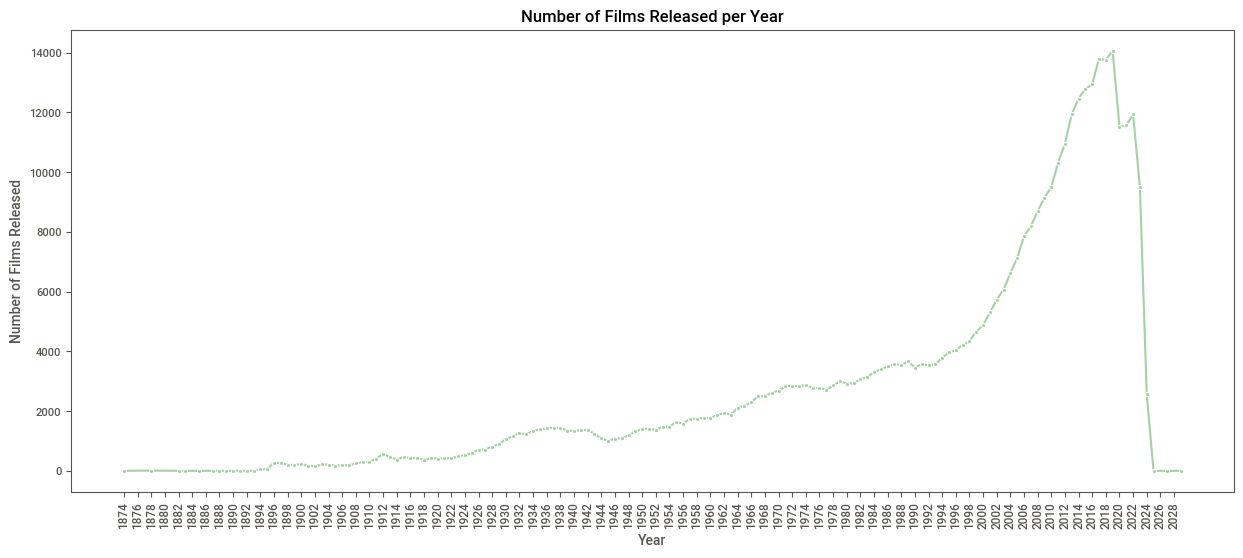

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=film_per_year.index, y=film_per_year.values, marker='o', color= '#A3D2A3')
plt.title('Number of Films Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Films Released')
plt.xticks(np.arange(df['release_year'].min(), df['release_year'].max()+1, 2), size= 8.5)
plt.xticks(rotation = 90)
plt.show()

#genres column

In [ ]:
#genre column //// so much rows have genres is NaN, so will delete it
df['genres'].isnull().sum()

np.int64(78181)

In [ ]:
df["genres"] = df["genres"].fillna("No genres")
filtered_df = df[df['genres'] != "No genres"]
all_genres = ', '.join(filtered_df['genres'].tolist())

In [ ]:
from wordcloud import WordCloud

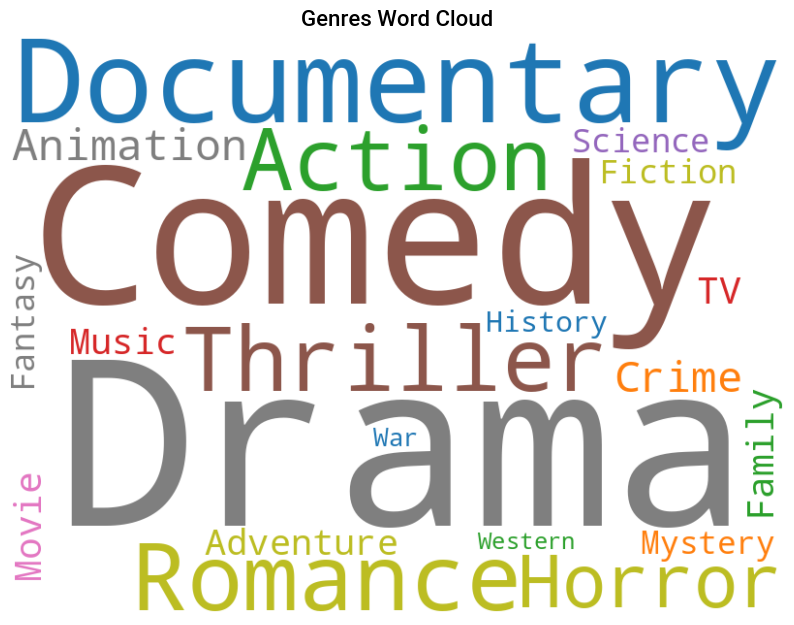

In [ ]:
#
wordcloud = WordCloud(
    width=800,
    height=600,
    background_color="white",
    colormap="tab10",
    max_words=200,
    contour_width=1.5,
    contour_color="lightblue",
    collocations=False
).generate(all_genres)

#
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Genres Word Cloud", fontsize=16)
plt.show()

In [ ]:
pd.Series(all_genres.split(', ')).value_counts()

,count
Drama,139936
Comedy,90932
Documentary,59498
Romance,36098
Thriller,32834
Action,30676
Horror,29934
Animation,25214
Crime,24472
TV Movie,18038


#production_companies column

In [ ]:
df['production_companies'].isnull().sum()

np.int64(172025)

In [ ]:
df['production_companies'] = df['production_companies'].fillna('no production_companies')
filtered_df = df[df['production_companies'] != "No production_companies"]
all_prod_companies = ', '.join(filtered_df['production_companies'].tolist())

In [ ]:
all_prod_companies_list =  all_prod_companies.split(', ')
company_counts = pd.Series(all_prod_companies_list).value_counts()
company_counts = company_counts[1:]
company_counts_df = company_counts.reset_index()
company_counts

,count
Warner Bros. Pictures,2940
Metro-Goldwyn-Mayer,2771
Columbia Pictures,2586
Paramount,2307
Universal Pictures,2145
...,...
Nomadi,1
International Media Productions,1
Sandwood Cinema,1
FNA,1


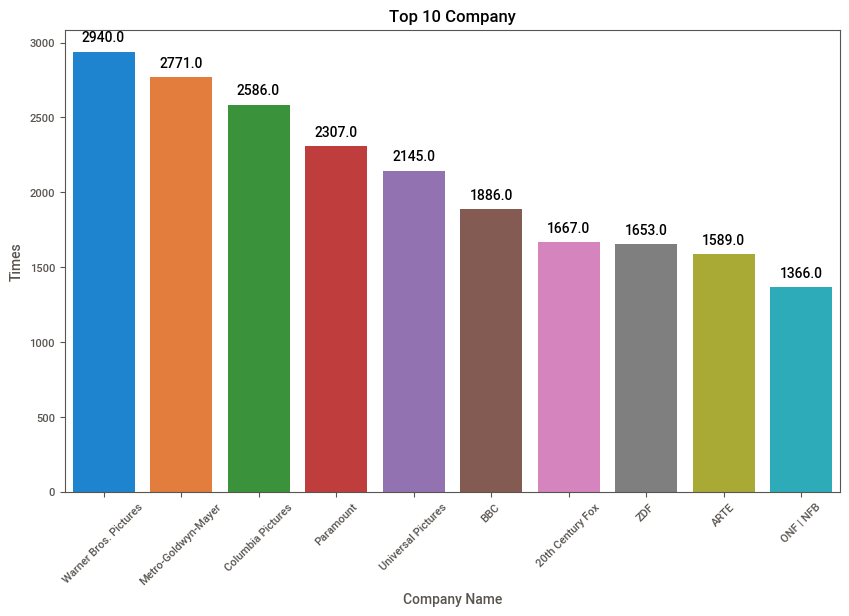

In [ ]:
#top10 company
plt.figure(figsize=(10,6))
ax = sns.barplot(data=company_counts_df.head(10), x = 'index', y = 'count', hue = 'index')
plt.title('Top 10 Company')
plt.xlabel('Company Name')
plt.xticks(rotation= 45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.ylabel('Times')
plt.show()

#production_countries column

In [ ]:
df['production_countries'].isnull().sum()

np.int64(112788)

In [ ]:
df['production_countries'] = df['production_countries'].fillna('No Production Countries')
countries_filted = df[df['production_countries'] != 'No Production Countries']
countries_list = ", ".join(countries_filted['production_countries'].tolist())

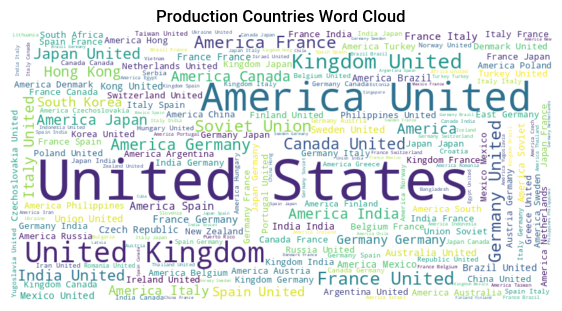

In [ ]:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      contour_color='green',
                      contour_width=1).generate(countries_list)

# Showing
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Production Countries Word Cloud")
plt.show()

In [ ]:
countries_df = pd.Series(countries_list.split(', ')).value_counts().reset_index()
countries_df

,index,count
0,United States of America,110437
1,France,24809
2,United Kingdom,23195
3,Germany,22129
4,India,14909
...,...,...
235,Cocos Islands,1
236,Norfolk Island,1
237,American Samoa,1
238,Niue,1


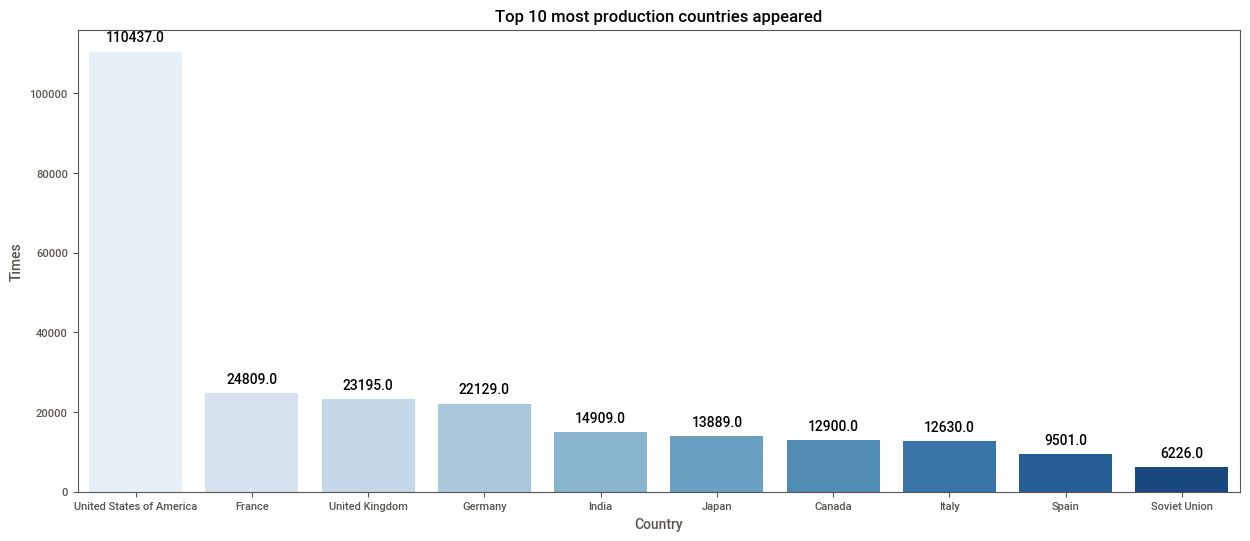

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=countries_df.head(10), x = 'index', y= 'count', hue = 'index', palette = 'Blues')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Top 10 most production countries appeared')
plt.xlabel('Country')
plt.ylabel('Times')
plt.show();

#spoken_languages column

In [ ]:
df['spoken_languages'].isnull().sum()

np.int64(102419)

In [ ]:
df['spoken_languages'] = df['spoken_languages'].fillna('Unknown')
languages_filted = df[df['spoken_languages'] !='Unknown']
language_list = ', '.join(languages_filted['spoken_languages'].tolist())

In [ ]:
languages_counts = pd.Series(language_list.split(', ')).value_counts()
languages_counts_df  = languages_counts.reset_index()
languages_counts

,count
English,154991
French,26651
Spanish,23386
German,21192
Japanese,14208
...,...
Limburgish,1
Nauru,1
Interlingua,1
Volapük,1


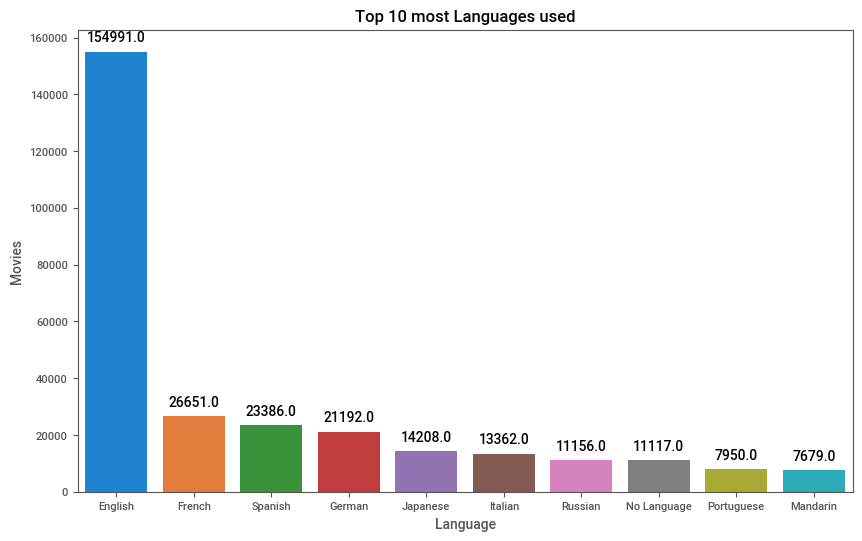

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = languages_counts_df.head(10), x = 'index' ,y = 'count', hue = 'index' )
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Top 10 most Languages used')
plt.xlabel('Language')
plt.ylabel('Movies')
plt.show()


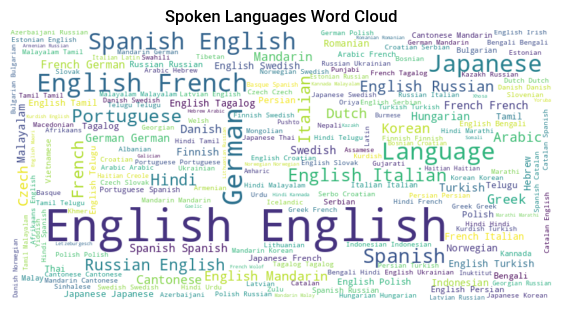

In [ ]:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      contour_color='green',
                      contour_width=1).generate(language_list)

# Showing
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Spoken Languages Word Cloud")
plt.show()

#keywords column

In [ ]:
df['keywords'].isnull().sum()

np.int64(263675)

In [ ]:
df['keywords'] = df['keywords'].fillna('Unknown')
keywords_filted = df[df['keywords'] != 'Unknown']
keyword_list = ', '.join(keywords_filted['keywords'].tolist())

In [ ]:
keyword_counts_df = pd.Series(keyword_list.split(', ')).value_counts().reset_index()
keyword_counts_df['index'] = keyword_counts_df['index'].str.capitalize()
keyword_counts_df

,index,count
0,Short film,14565
1,Woman director,13013
2,Based on novel or book,5397
3,Murder,4354
4,Lgbt,3610
...,...,...
39573,Barbiere,1
39574,Apolitical,1
39575,آندو,1
39576,Lyric opera,1


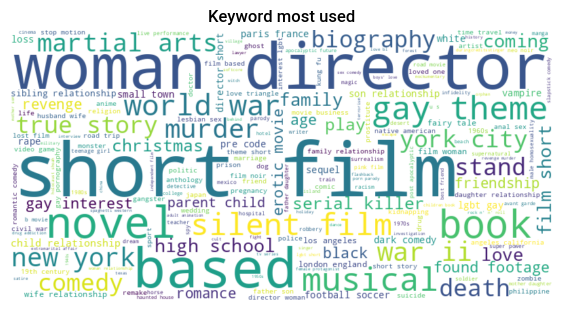

In [ ]:
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      contour_color='green',
                      contour_width=1).generate(keyword_list)

# Showing
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword most used")
plt.show()

#directors column

In [ ]:
df['directors'].isnull().sum()

np.int64(10263)

In [ ]:
df['directors'] = df['directors'].fillna('Unknown')
directors_filted = df[df['directors'] != 'Unknown']
director_list = ', '.join(directors_filted['directors'].tolist())
director_counts_df = pd.Series(director_list.split(', ')).value_counts().reset_index()
director_counts_df['index'] = director_counts_df['index'].str.title()
director_counts_df

,index,count
0,Eric Appel,1427
1,Kevin Dunn,569
2,Dave Fleischer,545
3,D.W. Griffith,387
4,Seymour Kneitel,379
...,...,...
163799,Jack Trowbridge,1
163800,Bennett Davlin,1
163801,Gilda Sheppard,1
163802,Abdul Rasheed,1


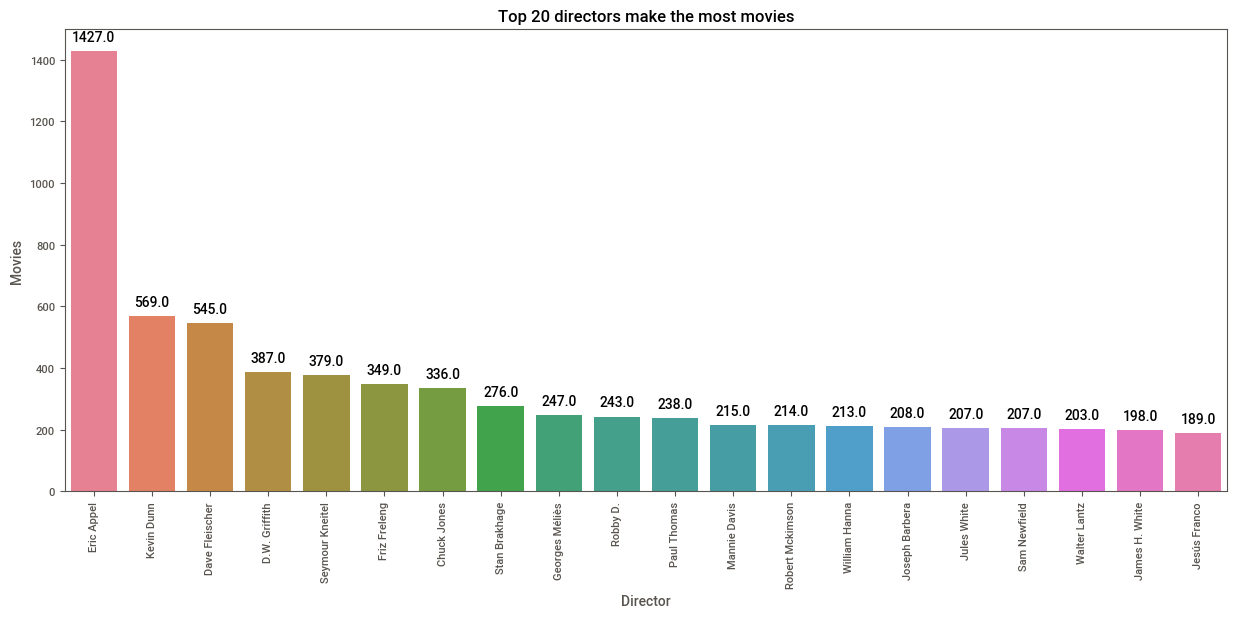

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data = director_counts_df.head(20), x = 'index' ,y = 'count', hue = 'index' )
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Top 20 directors make the most movies')
plt.xticks(rotation = 90)
plt.xlabel('Director')
plt.ylabel('Movies')
plt.show()

#writers column

In [ ]:
df['writers'].isnull().sum()

np.int64(66528)

In [ ]:
df['writers'] = df['writers'].fillna('Unknown')
writers_filted = df[df['writers'] != 'Unknown']
writer_list = ', '.join(writers_filted['writers'].tolist())
writer_counts_df = pd.Series(writer_list.split(', ')).value_counts().reset_index()
writer_counts_df['index'] = writer_counts_df['index'].str.title()
writer_counts_df

,index,count
0,Derek Kolstad,1419
1,Tripper Clancy,1415
2,Christopher Amick,1413
3,Ben Mekler,1413
4,William Shakespeare,676
...,...,...
252506,Ryan David Green,1
252507,Valentine Thomasset,1
252508,Janek Tarkowski,1
252509,Juan Mora Cid,1


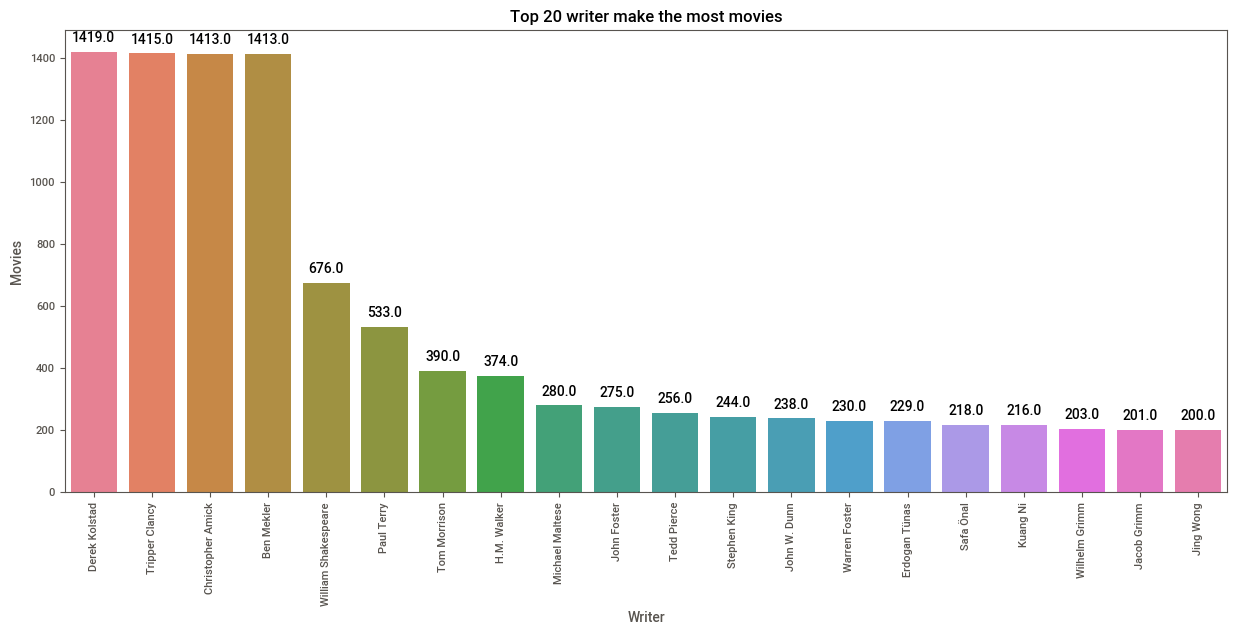

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data = writer_counts_df.head(20), x = 'index' ,y = 'count', hue = 'index' )
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Top 20 writer make the most movies')
plt.xticks(rotation = 90)
plt.xlabel('Writer')
plt.ylabel('Movies')
plt.show()

#averageRating column

In [ ]:
df['averageRating'].isnull().sum()

np.int64(0)

In [ ]:
#Average all movies rate
df['averageRating'].mean()

np.float64(6.2273871700614825)

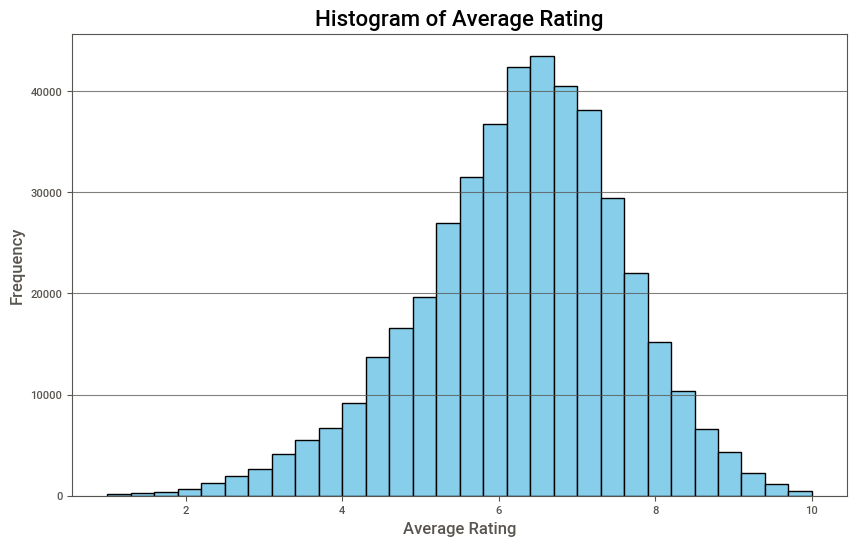

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['averageRating'],
         bins =30,
         color = 'skyblue',
         edgecolor='black',
         density=False)# frequency or percent
plt.title('Histogram of Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
#list 1 points
df[df['averageRating'] == 1]['title']

,title
34096,Reis
46738,2025: The World Enslaved by a Virus
54045,Cumali Ceber: Allah Seni Alsın
61134,Pure Hearts: Into Chinese Showbiz
66802,Laz Kit
71999,Justin Bieber: Rise to Fame
114507,Biebermania!
132137,Keratin
144095,Justin Bieber: A Star is Born
185568,Run


In [ ]:
#list 10 points
df[df['averageRating'] == 10]['title']

,title
145220,Dropping Gear
149092,minicômios
174723,Bereaved
178107,Marina
178831,The Guards Themselves
...,...
416722,A Postcard to Nina
424297,Dark Mountain
424948,Ba Ja Kiloh (But Is He Nice?)
425893,A Step Ahead of Time


In [ ]:
amount_rate_10 = df[df['averageRating'] == 10]['title'].count()
print(f'Amount movies rate 10 points: {amount_rate_10}')

Amount movies rate 10 points: 76


##### Map World

In [195]:
# === Step 3. Check for required columns ===
import plotly.express as px
required_cols = ['production_countries', 'revenue', 'vote_average', 'title', 'directors']
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# === Step 4. Data cleaning ===
# Remove rows that have no production country
df = df.dropna(subset=['production_countries'])
df['production_countries'] = df['production_countries'].astype(str).str.strip()

# If a movie has multiple countries listed, split them into separate rows
df_expanded = df.assign(production_countries=df['production_countries'].str.split(','))
df_expanded = df_expanded.explode('production_countries')
df_expanded['production_countries'] = df_expanded['production_countries'].str.strip()

# === Step 5. Aggregate statistics by country ===
country_stats = (
    df_expanded.groupby('production_countries')
    .agg(
        movie_count=('title', 'count'),
        avg_rating=('vote_average', 'mean'),
        avg_revenue=('revenue', 'mean'),
        top_director=('directors', lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
    )
    .reset_index()
)

country_stats = country_stats.fillna(0)

# === Step 6. Create interactive world map with Plotly ===
fig = px.choropleth(
    country_stats,
    locations="production_countries",     # Country column
    locationmode="country names",
    color="avg_rating",                   # Color by average rating
    hover_name="production_countries",
    hover_data={
        "movie_count": True,
        "avg_rating": ":.2f",
        "avg_revenue": ":.0f",
        "top_director": True
    },
    color_continuous_scale="RdYlGn",
    title="🎬 Global Movie Landscape — Ratings, Revenue & Directors"
)

# === Step 7. Customize map layout ===
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    margin=dict(l=0, r=0, t=40, b=0),
    title_font_size=18
)

# === Step 8. Display in Colab ===
fig.show()

# === Step 9. (Optional) Save as interactive HTML file ===
fig.write_html("movie_world_map.html", include_plotlyjs="cdn")

print(" Interactive map created! Open 'movie_world_map.html' to view offline.")


 Interactive map created! Open 'movie_world_map.html' to view offline.


In [201]:
!jupyter nbconvert --to html --no-prompt /content/*Code Project CSE 6242.ipynb


[NbConvertApp] WARNING | pattern '/content/*Code' matched no files
[NbConvertApp] WARNING | pattern 'Project' matched no files
[NbConvertApp] WARNING | pattern 'CSE' matched no files
[NbConvertApp] WARNING | pattern '6242.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file

In [202]:
# Script: build interactive dashboard and save as HTML
# Run in Colab / Jupyter. Installs (uncomment if needed):
# !pip install plotly wordcloud pillow

import pandas as pd
import numpy as np
import ast
from wordcloud import WordCloud
from PIL import Image
import io
import base64
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from collections import Counter


# Quick preview
print("Rows, cols:", df.shape)
# Ensure release_year column exists or create it
if 'release_date' in df.columns:
    # try to extract year as int
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
else:
    if 'release_year' not in df.columns:
        df['release_year'] = np.nan

# ---------------------------
# 2) Helper: parse JSON-like strings (genres, production_countries, production_companies, spoken_languages, keywords)
# ---------------------------
def parse_names_field(val, key_name='name'):
    """
    Given a string like "[{'id': 18, 'name': 'Drama'}, ...]" or a list object,
    return a list of names. If parsing fails, return empty list.
    """
    if pd.isna(val):
        return []
    if isinstance(val, list):
        # assume list of dicts
        try:
            return [d.get(key_name, str(d)) for d in val if isinstance(d, dict)]
        except:
            return [str(x) for x in val]
    if isinstance(val, str):
        s = val.strip()
        # If empty
        if s == '' or s.lower() == 'nan':
            return []
        # Already comma-separated simple string?
        if (',' in s) and ('{' not in s and '[' not in s):
            # treat as comma-separated words
            return [x.strip() for x in s.split(',') if x.strip()!='']
        # attempt ast literal eval
        try:
            parsed = ast.literal_eval(s)
            if isinstance(parsed, list):
                out = []
                for item in parsed:
                    if isinstance(item, dict):
                        # some dataset uses 'name', others 'iso_3166_1' etc.
                        if 'name' in item:
                            out.append(item['name'])
                        elif 'english_name' in item:
                            out.append(item['english_name'])
                        else:
                            # fallback to string repr
                            out.append(next((v for k,v in item.items() if isinstance(v,str)), str(item)))
                    else:
                        out.append(str(item))
                return out
            elif isinstance(parsed, dict):
                if 'name' in parsed:
                    return [parsed['name']]
                else:
                    return [str(parsed)]
            else:
                return [str(parsed)]
        except Exception:
            # fallback: return the raw string
            return [s]
    return []

# Apply parsing to columns we need (only if present)
cols_to_parse = {
    'genres': 'name',
    'production_countries': 'name',
    'production_companies': 'name',
    'spoken_languages': 'name',
    'keywords': 'name',
    'cast': None,      # sometimes cast is a list of names or dict
    'directors': None, # if already string of comma-separated directors
    'writers': None
}

for col, key in cols_to_parse.items():
    if col in df.columns:
        if key is None:
            # If directors/writers maybe already comma separated; try splitting on ', '
            # But keep flexible: parse JSON then fallback to splitting
            def parse_any(x):
                if pd.isna(x):
                    return []
                if isinstance(x, list):
                    # list of strings or dicts
                    res = []
                    for it in x:
                        if isinstance(it, dict):
                            if 'name' in it:
                                res.append(it['name'])
                            else:
                                # join values or str
                                try:
                                    res.append(str(it))
                                except:
                                    pass
                        else:
                            res.append(str(it))
                    return res
                if isinstance(x, str):
                    # try ast
                    try:
                        parsed = ast.literal_eval(x)
                        return parse_any(parsed)
                    except:
                        # fallback split by comma
                        return [s.strip() for s in x.split(',') if s.strip()!='']
                return []
            df[col + '_parsed'] = df[col].apply(parse_any)
        else:
            df[col + '_parsed'] = df[col].apply(lambda x: parse_names_field(x, key_name=key))
    else:
        df[col + '_parsed'] = [[]]*len(df)

# For 'directors' and 'writers' if they are strings like "A, B", we already handled above into *_parsed.
# Use safe names for variables:
genres_col = 'genres_parsed'
companies_col = 'production_companies_parsed'
countries_col = 'production_countries_parsed'
languages_col = 'spoken_languages_parsed'
keywords_col = 'keywords_parsed'
directors_col = 'directors_parsed'
writers_col = 'writers_parsed'
cast_col = 'cast_parsed'

# ---------------------------
# 3) Prepare summary series / counters used in original plots
# ---------------------------

# film_per_year: count films per release year (drop NaN)
film_per_year = df.dropna(subset=['release_year']).groupby('release_year').size().sort_index()

# all_genres: space/comma separated big string for wordcloud
all_genres = ' '.join([g for sub in df[genres_col].dropna() for g in sub])

# company counts
company_list = [c for sub in df[companies_col].dropna() for c in sub]
company_counts = Counter(company_list)
company_counts_df = pd.DataFrame(company_counts.most_common(), columns=['index','count'])

# countries
countries_list = ' '.join([c for sub in df[countries_col].dropna() for c in sub])
countries_counts = Counter([c for sub in df[countries_col].dropna() for c in sub])
countries_df = pd.DataFrame(countries_counts.most_common(), columns=['index','count'])

# languages
language_list = ' '.join([l for sub in df[languages_col].dropna() for l in sub])
languages_counts = Counter([l for sub in df[languages_col].dropna() for l in sub])
languages_counts_df = pd.DataFrame(languages_counts.most_common(), columns=['index','count'])

# keywords
keyword_list = ' '.join([k for sub in df[keywords_col].dropna() for k in sub])
keyword_counts = Counter([k for sub in df[keywords_col].dropna() for k in sub])
keyword_counts_df = pd.DataFrame(keyword_counts.most_common(), columns=['index','count'])

# directors & writers
director_counts = Counter([d for sub in df[directors_col].dropna() for d in sub])
director_counts_df = pd.DataFrame(director_counts.most_common(), columns=['index','count'])

writer_counts = Counter([w for sub in df[writers_col].dropna() for w in sub])
writer_counts_df = pd.DataFrame(writer_counts.most_common(), columns=['index','count'])

# averageRating distribution (use column that exists in your df)
rating_col = 'averageRating' if 'averageRating' in df.columns else ('vote_average' if 'vote_average' in df.columns else None)

# ---------------------------
# 4) Utility: make wordcloud image and return base64 PNG (to embed in HTML via <img>)
# ---------------------------
def wordcloud_to_base64(text, width=800, height=400, background_color='white', max_words=200, colormap=None):
    if (text is None) or (len(text.strip())==0):
        # return a small blank image
        img = Image.new('RGB', (width, height), color='white')
    else:
        wc = WordCloud(width=width, height=height, background_color=background_color,
                       max_words=max_words, collocations=False, colormap=colormap)
        img = wc.generate(text).to_image()
    buffer = io.BytesIO()
    img.save(buffer, format='PNG')
    encoded = base64.b64encode(buffer.getvalue()).decode('utf-8')
    return 'data:image/png;base64,' + encoded

# Build wordcloud images (as base64 strings)
wc_genres_b64 = wordcloud_to_base64(all_genres or '')
wc_countries_b64 = wordcloud_to_base64(countries_list or '')
wc_languages_b64 = wordcloud_to_base64(language_list or '')
wc_keywords_b64 = wordcloud_to_base64(keyword_list or '')

# ---------------------------
# 5) Create Plotly figures (interactive)
# ---------------------------

# 5.1 Line: films per year
fig_film_year = px.line(x=film_per_year.index, y=film_per_year.values,
                        labels={'x':'Year','y':'Number of Films'},
                        title='Number of Films Released per Year')
fig_film_year.update_traces(mode='lines+markers')

# 5.2 Bar: top companies
top_companies = company_counts_df.head(10).iloc[::-1]  # reverse for horizontal bar order
fig_companies = px.bar(top_companies, x='count', y='index', orientation='h',
                       labels={'count':'Times','index':'Company'},
                       title='Top 10 Companies')
fig_companies.update_layout(yaxis={'categoryorder':'total ascending'})

# 5.3 Wordclouds will be embedded as images using plotly's layout images or as px.imshow:
def img_fig_from_b64(b64png, title=''):
    import numpy as np, PIL.Image
    # create a minimal figure with the image
    fig = go.Figure()
    fig.add_layout_image(
        dict(
            source=b64png,
            xref="x", yref="y",
            x=0, y=0,
            sizex=1, sizey=1,
            xanchor="left",
            yanchor="bottom",
            sizing="stretch"
        )
    )
    # axes off
    fig.update_xaxes(visible=False, range=[0,1])
    fig.update_yaxes(visible=False, range=[0,1])
    fig.update_layout(title=title, width=650, height=450, margin=dict(l=10,r=10,t=40,b=10))
    return fig

fig_wc_genres = img_fig_from_b64(wc_genres_b64, title='Genres Word Cloud')
fig_wc_countries = img_fig_from_b64(wc_countries_b64, title='Production Countries Word Cloud')
fig_wc_languages = img_fig_from_b64(wc_languages_b64, title='Spoken Languages Word Cloud')
fig_wc_keywords = img_fig_from_b64(wc_keywords_b64, title='Most Used Keywords Word Cloud')

# 5.4 Bar: top countries
top_countries = countries_df.head(10)
fig_countries = px.bar(top_countries, x='count', y='index', orientation='h',
                       labels={'count':'Times','index':'Country'}, title='Top 10 Production Countries')
fig_countries.update_layout(yaxis={'categoryorder':'total ascending'})

# 5.5 Bar: top languages
top_lang = languages_counts_df.head(10)
fig_languages = px.bar(top_lang, x='count', y='index', orientation='h',
                       labels={'count':'Movies','index':'Language'}, title='Top 10 Spoken Languages')
fig_languages.update_layout(yaxis={'categoryorder':'total ascending'})

# 5.6 Bar: top directors & writers
top_directors = director_counts_df.head(20)
fig_directors = px.bar(top_directors, x='count', y='index', orientation='h',
                       labels={'count':'Movies','index':'Director'}, title='Top 20 Directors')
fig_directors.update_layout(yaxis={'categoryorder':'total ascending'}, height=800)

top_writers = writer_counts_df.head(20)
fig_writers = px.bar(top_writers, x='count', y='index', orientation='h',
                     labels={'count':'Movies','index':'Writer'}, title='Top 20 Writers')
fig_writers.update_layout(yaxis={'categoryorder':'total ascending'}, height=800)

# 5.7 Histogram: average ratings
if rating_col:
    fig_rating = px.histogram(df, x=rating_col, nbins=30, title='Histogram of Average Rating')
else:
    fig_rating = go.Figure()
    fig_rating.update_layout(title='Rating column not found')

# ---------------------------
# 6) Build single HTML with all figures embedded
#    We'll use plotly.io.to_html for each fig (partial) and then stitch
# ---------------------------

# List of (title, fig) in the order you want them displayed
figs = [
    ('Films per Year', fig_film_year),
    ('Top Companies', fig_companies),
    ('Genres WordCloud', fig_wc_genres),
    ('Top Countries', fig_countries),
    ('Countries WordCloud', fig_wc_countries),
    ('Top Languages', fig_languages),
    ('Languages WordCloud', fig_wc_languages),
    ('Keywords WordCloud', fig_wc_keywords),
    ('Top Directors', fig_directors),
    ('Top Writers', fig_writers),
    ('Rating Distribution', fig_rating)
]

# Convert each fig to an HTML div (without including plotly.js per-div)
partials = [pio.to_html(f, full_html=False, include_plotlyjs=False, default_height='100%', default_width='100%') for _, f in figs]

# Single HTML template: include plotly.js once (using CDN), and then each partial inside a responsive container
html_parts = []
html_parts.append("<!DOCTYPE html><html><head><meta charset='utf-8'/>")
html_parts.append("<meta name='viewport' content='width=device-width, initial-scale=1'>")
html_parts.append("<title>Movies Dashboard</title>")
# include Plotly JS from CDN
html_parts.append("<script src='https://cdn.plot.ly/plotly-latest.min.js'></script>")
# simple styling for layout
html_parts.append("""
<style>
body { font-family: Arial, sans-serif; margin: 10px; background: #fff; color:#111; }
.header { text-align:center; padding:10px; }
.container { display:flex; flex-wrap:wrap; gap:20px; justify-content:center; }
.panel { background: #f8f9fb; border-radius:8px; padding:10px; box-shadow:0 1px 3px rgba(0,0,0,0.08); }
.panel.full { width: 100%; max-width:1200px; }
.panel.half { width: calc(50% - 30px); min-width: 340px; }
.panel.third { width: calc(33% - 30px); min-width: 300px; }
.panel img { max-width:100%; height:auto; display:block; margin:0 auto; }
@media (max-width:900px){
  .panel.half, .panel.third { width: 100%; }
}
</style>
""")
html_parts.append("</head><body>")
html_parts.append("<div class='header'><h1>Interactive Movies Dashboard</h1><p>Generated by script</p></div>")
html_parts.append("<div class='container'>")

# choose layout per figure (you can change classes)
# Make the first a full-width panel
for i, (title, fig) in enumerate(figs):
    # choose class
    if title in ('Films per Year', 'Top Directors', 'Top Writers'):
        cls = 'panel full'
    elif 'WordCloud' in title:
        cls = 'panel third'
    else:
        cls = 'panel half'
    html_parts.append(f"<div class='{cls}'>")
    html_parts.append(partials[i])
    html_parts.append("</div>")

html_parts.append("</div></body></html>")

final_html = '\n'.join(html_parts)

# 7) Save to file
out_path = '/content/movies_dashboard.html'
with open(out_path, 'w', encoding='utf-8') as f:
    f.write(final_html)

print("Saved dashboard HTML to:", out_path)
print("You can download it from the Files panel or run: from google.colab import files; files.download('/content/movies_dashboard.html')")

# If running in Colab and want automatic download uncomment:
# from google.colab import files
# files.download(out_path)


Rows, cols: (321649, 38)
Saved dashboard HTML to: /content/movies_dashboard.html
You can download it from the Files panel or run: from google.colab import files; files.download('/content/movies_dashboard.html')


In [189]:
!pip install plotly wordcloud pillow

In [203]:
import nbformat
from google.colab import output
from nbconvert import HTMLExporter

notebook_path = '/content/Code_Project_CSE_6242.ipynb'
html_path = '/content/my_notebook.html'

# Xuất ra file HTML
!jupyter nbconvert --to html --output my_notebook.html "$notebook_path"




[NbConvertApp] Converting notebook /content/Code_Project_CSE_6242.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/jupyter_core/application.py", line 284, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 563, in convert_single_notebook
    output, resources = self.export_single_notebook(
                        ^^^^^^^^^^^^^^^^^^^^^^^^